# Classification of E-Mails into Spam and Ham using Naive Bayes Algorithm

### About the Project :

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.



## Importing the Libraries :

In [32]:
# Analysis 
import pandas as pd 
import numpy as np 

# Visualization
import matplotlib.pyplot as plt              
import seaborn as sns 
%matplotlib inline

## Loading the Dataset :

In [33]:
df = pd.read_csv("emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## Data Preprocessing :

Before proceeding, let us check whether there are any null values in the dataset or not.

In [34]:
df.isnull().sum()

text    0
spam    0
dtype: int64

We can see that our dataset has no null values.

### Visualizing the number of spam messages :

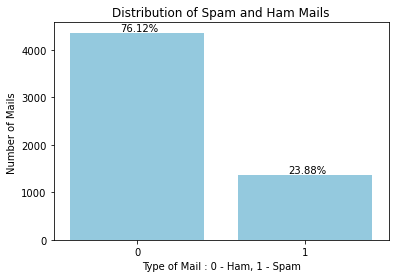

In [35]:
ax = sns.countplot(x="spam", data=df, color="skyblue")
plt.title('Distribution of Spam and Ham Mails')
plt.ylabel('Number of Mails ')
plt.xlabel("Type of Mail : 0 - Ham, 1 - Spam")
total = len(df["spam"].tolist())
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.1
        y = p.get_y() + p.get_height() + 0.1
        ax.annotate(percentage, (x, y+35))
plt.show()

Thus, we can see that about 76.12 % of the total e-mails are legitimate i.e. ham but 23.88 % of the e-mails are spam.

### Preparing the data :

To apply Naive Bayes Algorithm, we need a matrix with the words in the mails and their frequencies i.e. the number of occurences in each mail. But before that, we need to clean our dataset so that it does not contain any punctuation marks or stop words.

For the cleaning of the data, we define a function which will be applied to each mail in our dataset to clean it.

In [36]:
# For removal of punctuation marks
import string

# For removal of stopwords
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

# Defining a pipeline for the removal of punctuation marks and stopwords
def message_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords]
    return punc_removed_join_clean

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kgang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Applying Count Vectorizer to the Messages List :

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# Adding the Data Cleaning Pipeline as our Analyzer in our vectorizer 
vectorizer = CountVectorizer(analyzer=message_cleaning)
df_countvectorized = vectorizer.fit_transform(df["text"])

In [38]:
print(df_countvectorized.shape)

(5728, 37229)


We can see that there are 37229 features (words) after applying the count-vectorizer to our dataset.

### Adding feature of TF-IDF :

- Tf–idf stands for "Term Frequency–Inverse Document Frequency" is a numerical statistic used to reflect how important a word is to a document in a collection or corpus of documents. 
- TFIDF is used as a weighting factor during text search processes and text mining.
- The intuition behing the TFIDF is as follows: if a word appears several times in a given document, this word might be meaningful (more important) than other words that appeared fewer times in the same document. However, if a given word appeared several times in a given document but also appeared many times in other documents, there is a probability that this word might be common frequent word such as 'I' 'am'..etc. (not really important or meaningful!).


- TF: Term Frequency is used to measure the frequency of term occurrence in a document: 
    - TF(word) = Number of times the 'word' appears in a document / Total number of terms in the document
- IDF: Inverse Document Frequency is used to measure how important a term is: 
    - IDF(word) = log_e(Total number of documents / Number of documents with the term 'word' in it).

- Example: Let's assume we have a document that contains 1000 words and the term “John” appeared 20 times, the Term-Frequency for the word 'John' can be calculated as follows:
    - TF|john = 20/1000 = 0.02

- Let's calculate the IDF (inverse document frequency) of the word 'john' assuming that it appears 50,000 times in a 1,000,000 million documents (corpus). 
    - IDF|john = log (1,000,000/50,000) = 1.3

- Therefore the overall weight of the word 'john' is as follows 
    - TF-IDF|john = 0.02 * 1.3 = 0.026

We will now apply the feature of TF-IDF

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

df_tfidf = TfidfTransformer().fit_transform(df_countvectorized)
print(df_tfidf.shape)

(5728, 37229)


Now that the data is cleaned and preprocessed, we will move on to build our model.

## Building and Training the Model :

We will use a Multinomial Naive Bayes Classifier for classifying the mails as Spam or Mail.

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

Separating the Features and The Labels :

In [41]:
X = df_tfidf.toarray()
y = df["spam"].values

### Splitting the dataset into Training and Testing Sets:

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Training The Model :

In [43]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

## Evaluating The Model :

For evaluating the model, we will use a Confusion Matrix and a Classification Report for finding the Precision, Recall and F1 Score.

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

### Plotting a Confusion Matrix for the Training Data :

<AxesSubplot:>

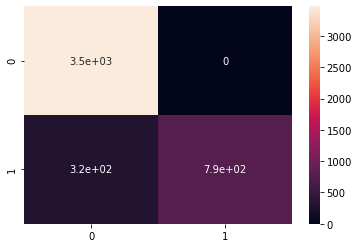

In [45]:
y_predict_train = nb_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

### Plotting a Confusion Matrix for the Test Data :

<AxesSubplot:>

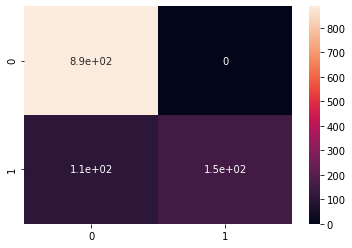

In [46]:
y_predict_test = nb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

### Plotting The Classification Report for the Testing Data : 

In [47]:
print(classification_report(y_test, y_predict_test,))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       887
           1       1.00      0.59      0.74       259

    accuracy                           0.91      1146
   macro avg       0.95      0.80      0.84      1146
weighted avg       0.92      0.91      0.90      1146

